<a href="https://colab.research.google.com/github/Soufiane4906/.Identity_ManageUserRoles/blob/main/Deep_learningCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab : Deep Learning pour la Classification d'Images d'Animaux

Ce laboratoire explore l'application des techniques de deep learning pour la classification d'images d'animaux. L'objectif principal est de développer un modèle de réseau de neurones convolutifs (CNN) capable de classer des images d'animaux en différentes catégories, telles que les chats, les chiens et les chevaux. Le lab est structuré en plusieurs étapes, allant du chargement des données à l'entraînement et à l'évaluation du modèle.

---

## Travail à Réaliser

### 1. Ajout d'images
- **Ajoutez un total de 50 images pour chaque classe** (chat, chien, cheval).
- Assurez-vous que les images sont correctement labellisées et placées dans les dossiers correspondant à chaque classe.

### 2. Chargement et division des données
- **Chargez toutes les images des trois classes**.
- **Divisez les données en trois ensembles** :
  - **Ensemble d'entraînement** : 70% des images (soit 105 images).
  - **Ensemble de validation** : 20% des images (soit 30 images).
  - **Ensemble de test** : 10% des images (soit 15 images).
- Vous pouvez utiliser la fonction `train_test_split` de `scikit-learn` pour réaliser cette division.

### 3. Réentraînement du modèle
- **Ré-entraînez le modèle fourni sur les nouvelles données**.
- Utilisez **30 époques** comme hyperparamètre d'entraînement.
- Précisez un **batch size de 16**.

### 4. Évaluation du réseau
- **Écrivez des fonctions Python** pour calculer les métriques suivantes sur l'ensemble de test :
  - **Précision (Precision)**
  - **Rappel (Recall)**
  - **F1-Score**
- **Affichez ces métriques** pour évaluer les performances du réseau.

---

## Étapes Clés du Lab

### 1. Chargement des Données
Les images sont chargées à partir d'un dataset disponible sur Kaggle. Les images sont ensuite prétraitées pour être utilisées dans le modèle.

### 2. Préparation des Données
Les images sont redimensionnées et normalisées. Les données sont ensuite divisées en ensembles d'entraînement, de validation et de test.

### 3. Construction du Modèle
Un modèle CNN est construit en utilisant Keras. Le modèle comprend plusieurs couches de convolution, de pooling, et des couches fully connected.

### 4. Entraînement du Modèle
Le modèle est entraîné sur les données d'entraînement, avec une validation sur l'ensemble de validation. L'évolution de la précision et de la perte est suivie au cours des époques.

### 5. Évaluation du Modèle
Le modèle est évalué sur l'ensemble de test pour mesurer sa performance. La précision et la perte sont calculées.

### 6. Sauvegarde du Modèle
Le modèle entraîné est sauvegardé pour une utilisation future.

---



In [2]:
from glob import glob
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow import keras




In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arifmia/animal")

print("Path to dataset files:", path)

100%|██████████| 440M/440M [00:08<00:00, 53.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/arifmia/animal/versions/1


In [ ]:
path_image="/root/.cache/kagglehub/datasets/arifmia/animal/versions/1"

In [3]:
print(glob(path_image))

['/root/.cache/kagglehub/datasets/arifmia/animal/versions/1']


In [6]:
#demarche :
#definir une fontion pour charger les images avec la sortie X, Y
#X :etant les images transfomées
#Y : les labels, etiquettes, les Classes
# image size= 128x128

def load_data(img_size=(128,128), path=''):
    X=[]
    Y=[]

    #recuperer le noms des dossier comme classes
    class_names= sorted([folder for folder in os.listdir(path) if os.path.isdir(os.path.join(path,folder))])
    class_map= {name : idx for idx, name  in enumerate(class_names)}

    print("Class: ",class_map)

    #charger les Image associées a chaque classes
    for label_name, lable_idx in class_map.items():
        folder_path = os.path.join(path, label_name)
        images_files = glob(f"{folder_path}/*")     #si vous voulez charger que les image .jpg  =>/*.jpg

        for file_path in images_files:
            #charger une image et la trasnformer
            img= load_img(file_path, target_size=img_size)
            img_array = img_to_array(img)/255.0

            X.append(img_array)
            Y.append(lable_idx)

    X = np.array(X, dtype=np.float32)
    Y = np.array(Y, dtype=np.int32)

    return X, Y, class_map


In [9]:
X, Y, class_mapping=load_data(path="/root/.cache/kagglehub/datasets/arifmia/animal/versions/1/Dataset/test/")

Class:  {'cat': 0, 'dog': 1, 'horse': 2}


In [10]:
print(X.shape)

(358, 128, 128, 3)


In [11]:
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [27]:
from sklearn.model_selection import train_test_split

# Division des données : entraînement (70%) et temporaire (validation + test = 30%)
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)

# Division des données restantes (X_temp, Y_temp) en validation (20%) et test (10%)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.3333, random_state=42)

# Affichage des tailles des ensembles
print(f"Taille de l'ensemble d'entraînement : {len(X_train)} images")
print(f"Taille de l'ensemble de validation : {len(X_val)} images")
print(f"Taille de l'ensemble de test : {len(X_test)} images")


Taille de l'ensemble d'entraînement : 250 images
Taille de l'ensemble de validation : 72 images
Taille de l'ensemble de test : 36 images


In [13]:
#Reseau de Neurone convolutionel
from tensorflow import keras

def model(img_size=(128, 128), classe=3):
    input = keras.Input(shape=(img_size[0], img_size[1], 3))

    # Bloc 1
    x = keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(input)
    x = keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)

    # Bloc 2
    x = keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)

    # Bloc 3
    x = keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)

    # Bloc 4
    x = keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)

    # Flatten + Denses
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(128, activation='relu')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Dropout(0.5)(x)

    output = keras.layers.Dense(classe, activation='softmax')(x)

    return keras.Model(inputs=input, outputs=output)


In [14]:

model_instance= model(img_size=(128,128))

model_instance.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
#Afficher resumer (Summary)
model_instance.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 8, 8, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 9,474,627 (36.14 MB)

 Trainable params: 9,472,451 (36.13 MB)

 Non-trainable params: 2,176 (8.50 KB)

In [16]:
epoch = 30
history = model_instance.fit(X_train,Y_train, validation_data=(X_val, Y_val),
                             epochs= epoch,
                             batch_size = 16)


Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 185s 10s/step - accuracy: 0.4085 - loss: 2.1765 - val_accuracy: 0.4722 - val_loss: 14.3226
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 211s 10s/step - accuracy: 0.4495 - loss: 1.5181 - val_accuracy: 0.2361 - val_loss: 6.7639
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 190s 10s/step - accuracy: 0.5949 - loss: 1.0463 - val_accuracy: 0.4444 - val_loss: 1.3362
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 214s 10s/step - accuracy: 0.5308 - loss: 1.0850 - val_accuracy: 0.6250 - val_loss: 0.9652
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 197s 10s/step - accuracy: 0.5770 - loss: 1.1021 - val_accuracy: 0.3611 - val_loss: 1.0945
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 185s 10s/step - accuracy: 0.5520 - loss: 1.1796 - val_accuracy: 0.6111 - val_loss: 0.8851
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 196s 10s/step - accuracy: 0.6339 - loss: 0.9994 - val_accuracy: 0.4583 - val_loss: 1.0033
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 182s 10s/step - accuracy: 0.6811 - loss: 0.8516 - val_accuracy: 0

In [17]:
model_instance.save("./VGG.h5")

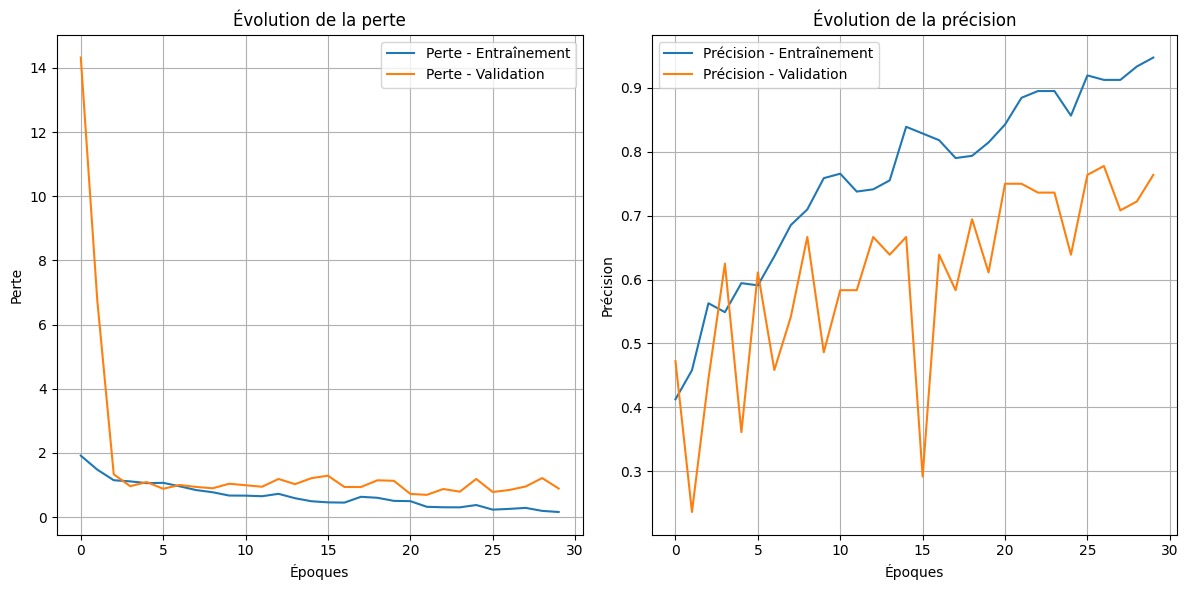

In [21]:
from matplotlib import pyplot as plt
# Tracer la courbe de perte
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Première courbe (1 ligne, 2 colonnes, 1er plot)
plt.plot(history.history['loss'], label='Perte - Entraînement')
plt.plot(history.history['val_loss'], label='Perte - Validation')
plt.title('Évolution de la perte')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.grid()

# Tracer la courbe de précision (si disponible)
if 'accuracy' in history.history:
    plt.subplot(1, 2, 2)  # Deuxième courbe (1 ligne, 2 colonnes, 2e plot)
    plt.plot(history.history['accuracy'], label='Précision - Entraînement')
    plt.plot(history.history['val_accuracy'], label='Précision - Validation')
    plt.title('Évolution de la précision')
    plt.xlabel('Époques')
    plt.ylabel('Précision')
    plt.legend()
    plt.grid()

# Afficher les courbes
plt.tight_layout()
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step


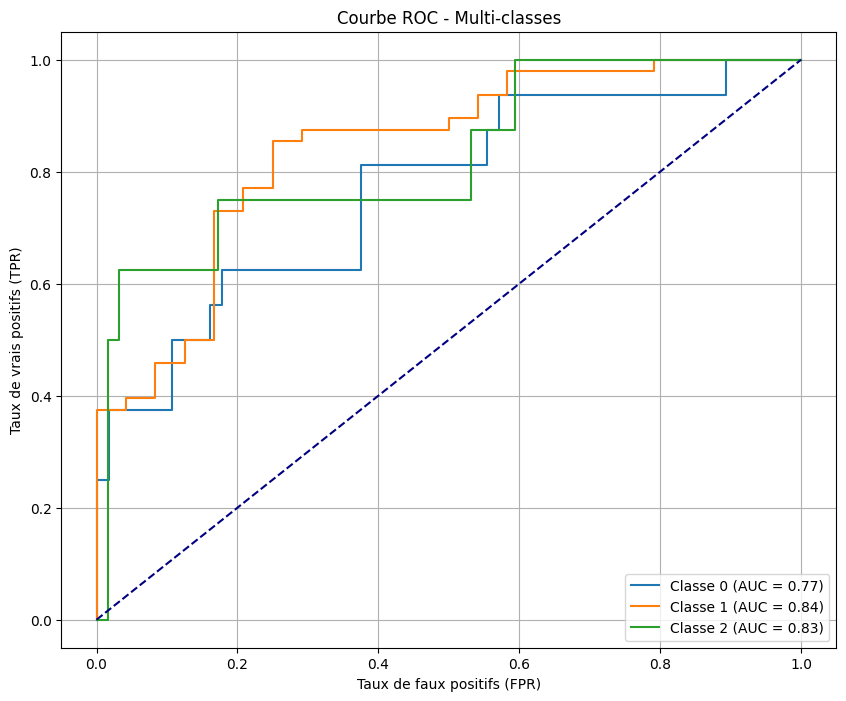

In [22]:
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


# Conversion des étiquettes si nécessaire
if len(Y_train.shape) == 1:
    num_classes = len(np.unique(Y_train))
    Y_train = to_categorical(Y_train, num_classes=num_classes)
    Y_val = to_categorical(Y_val, num_classes=num_classes)

# Prédictions de probabilistes
Y_pred_proba = model_instance.predict(X_val)

# Multi-classes ou binaire
if Y_train.shape[1] > 1:  # Multi-classes
    num_classes = Y_train.shape[1]
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_val[:, i], Y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Tracer toutes les courbes ROC
    plt.figure(figsize=(10, 8))
    for i in range(num_classes):
        plt.plot(
            fpr[i], tpr[i], label=f"Classe {i} (AUC = {roc_auc[i]:.2f})"
        )

    plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
    plt.title("Courbe ROC - Multi-classes")
    plt.xlabel("Taux de faux positifs (FPR)")
    plt.ylabel("Taux de vrais positifs (TPR)")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

else:  # Problème binaire
    fpr, tpr, _ = roc_curve(Y_val[:, 1], Y_pred_proba[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
    plt.title("Courbe ROC - Binaire")
    plt.xlabel("Taux de faux positifs (FPR)")
    plt.ylabel("Taux de vrais positifs (TPR)")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()


Class map:  {'Dataset': 0}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


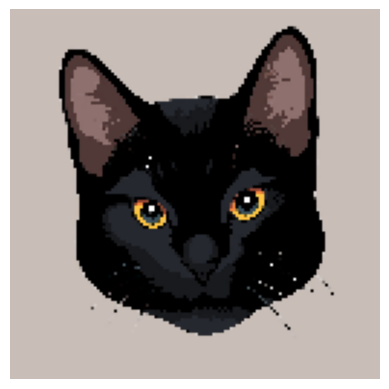

Classe prédite: Dataset


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing import image  # Assurez-vous d'importer ce module

# Charger le modèle VGG
model = load_model('./VGG.h5') #Pensez a changer le path vers le bon sur votre ordinateur

# Chemin du dossier où sont stockées les classes
path = "/root/.cache/kagglehub/datasets/arifmia/animal/versions/1"  # Remplacez par le chemin de votre dossier
class_names = sorted([folder for folder in os.listdir(path) if os.path.isdir(os.path.join(path, folder))])
class_map = {name: idx for idx, name in enumerate(class_names)}  # Mapping des classes

# Affichage des classes
print("Class map: ", class_map)

# Charger l'image à prédire
img_path = '/root/.cache/kagglehub/datasets/arifmia/animal/versions/1/Dataset/test/cat/6fcc622575e0d1fd0cf7f04c4472fd6a0f97defb7cfc3bc54e2e9a7caa9ddc438c190d7_1920.png'  # Remplacez par le chemin de l'image
img = image.load_img(img_path, target_size=(128, 128))  # Ajuster la taille selon votre modèle
img_array = image.img_to_array(img) / 255.0  # Normaliser l'image (valeurs entre 0 et 1)

# Ajouter une dimension pour simuler un lot d'images (batch)
img_array = np.expand_dims(img_array, axis=0)

# Faire la prédiction
predictions = model.predict(img_array)

# Affichage de l'image avec matplotlib
plt.imshow(img)
plt.axis('off')  # Cacher les axes pour une meilleure visibilité
plt.show()

# Obtenir la classe prédite
predicted_class_idx = np.argmax(predictions, axis=1)  # Classe prédite (index)
predicted_class_name = list(class_map.keys())[list(class_map.values()).index(predicted_class_idx[0])]  # Nom de la classe prédite

# Affichage de la classe prédite
print(f"Classe prédite: {predicted_class_name}")


In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Conversion des étiquettes si elles ne sont pas catégoriques
if len(Y_test.shape) == 1:
    num_classes = len(np.unique(Y_test))
    Y_test = to_categorical(Y_test, num_classes=num_classes)

# Prédictions des classes pour l'ensemble de test
Y_pred = model_instance.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)  # Classes prédites
Y_test_classes = np.argmax(Y_test, axis=1)  # Classes réelles

# Calcul des métriques
precision = precision_score(Y_test_classes, Y_pred_classes, average="weighted")
recall = recall_score(Y_test_classes, Y_pred_classes, average="weighted")
f1 = f1_score(Y_test_classes, Y_pred_classes, average="weighted")

# Affichage des résultats
print("Évaluation des performances du réseau :")
print(f"Précision : {precision:.4f}")
print(f"Rappel : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")

# Rapport de classification complet
print("\nRapport de classification :")
print(classification_report(Y_test_classes, Y_pred_classes))


2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 567ms/step
Évaluation des performances du réseau :
Précision : 0.8967
Rappel : 0.9167
F1-Score : 0.8993

Rapport de classification :
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.91      1.00      0.95        29
           2       0.00      0.00      0.00         1

    accuracy                           0.92        36
   macro avg       0.64      0.56      0.58        36
weighted avg       0.90      0.92      0.90        36



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

## Conclusion du Lab

Ce lab vous a guidé à travers les étapes essentielles pour construire et entraîner un modèle de deep learning pour la classification d'images d'animaux. Vous avez appris à charger et prétraiter des données, à construire un modèle CNN, à l'entraîner et à l'évaluer. Ces compétences sont fondamentales pour tout projet de deep learning et peuvent être appliquées à une variété de problèmes de classification d'images.

En explorant davantage, vous pourriez envisager d'améliorer le modèle en ajustant les hyperparamètres, en utilisant des techniques d'augmentation de données, ou en explorant des architectures de réseaux de neurones plus complexes. Le deep learning offre un vaste champ de possibilités, et ce lab n'est qu'un point de départ pour vos explorations futures dans ce domaine passionnant.